#### Import key libraries, classes, and function

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [6]:
df = pd.read_csv('Data/uspopulation.csv', index_col='DATE', parse_dates=True)

In [11]:
df.index.freq = 'MS'

In [12]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


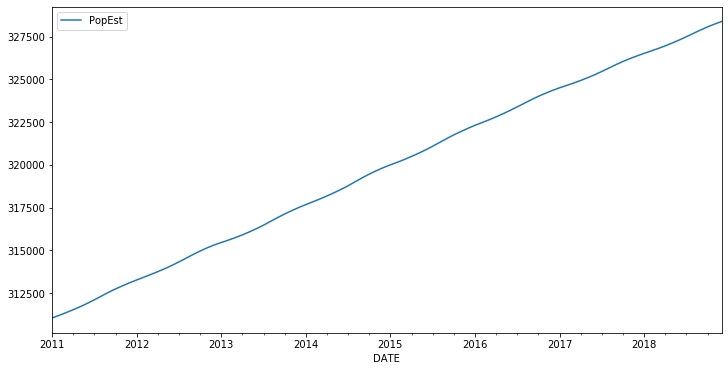

In [10]:
df.plot(figsize=(12,6));

In [13]:
# One year training set
train = df.iloc[:84]
test = df.iloc[84:]

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
model = AR(train['PopEst'])

In [18]:
AR1fit = model.fit(maxlag=1)

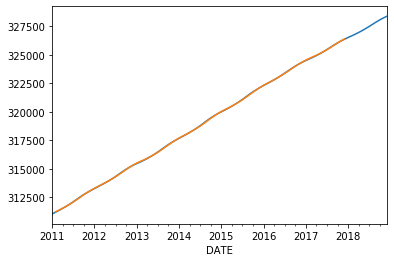

In [25]:
df['PopEst'].plot()
AR1fit.fittedvalues.plot()

In [26]:
AR1fit.k_constant

0

In [34]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

#### Forecasting values

In [35]:
start = len(train)

In [37]:
end = len(train) + len(test) -1

In [39]:
end

95

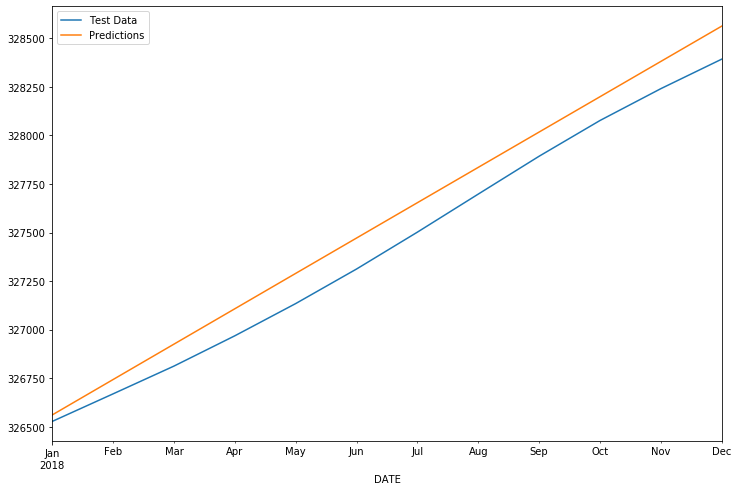

In [44]:
test['PopEst'].plot(legend=True, label='Test Data')
AR1fit.predict(start=start, end=end).plot(legend=True, label='Predictions', figsize=(12,8))

In [45]:
predictions1 = AR1fit.predict(start=start, end=end)

In [46]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [47]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [49]:
model2 = AR(df['PopEst'])

In [50]:
AR2fit = model2.fit(maxlag=2)

In [51]:
AR2fit.params

const        138.387882
L1.PopEst      1.853897
L2.PopEst     -0.854246
dtype: float64

In [52]:
prediction2 = AR2fit.predict(start=start, end=end)

In [53]:
prediction2 = prediction2.rename('AR(2) model')

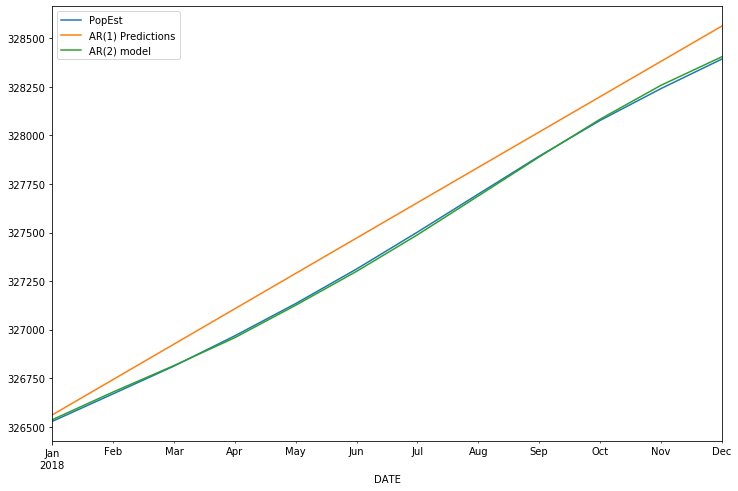

In [57]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
prediction2.plot(legend=True, figsize=(12,8))

In [62]:
AR2fit.resid.mean()

-8.608108049536005e-08

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

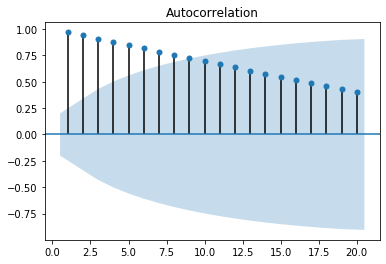

In [66]:
plot_acf(df['PopEst'], zero=False);

In [67]:
ARfit = model.fit(ic='t-stat')

In [70]:
predictions8 = ARfit.predict(start=start, end=end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [68]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
labels = ['AR1', 'AR2','AR8']

In [73]:
preds = [predictions1, prediction2, predictions8]

In [79]:
for i in range(len(preds)):
    error = np.sqrt(mean_squared_error(test['PopEst'],preds[i]))
    print('labels {} RMSE was : {}'.format(i,error))

labels 0 RMSE was : 132.09736651264984
labels 1 RMSE was : 10.22627005449969
labels 2 RMSE was : 13.673718813461983


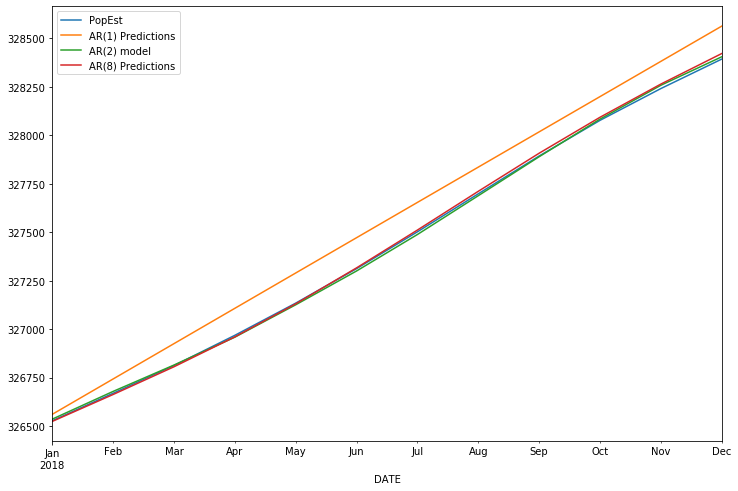

In [80]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
prediction2.plot(legend=True, figsize=(12,8))
predictions8.plot(legend=True)

In [81]:
# Forecasting - 2020  
model = AR(df['PopEst'])
ARfit = model.fit()
forcasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

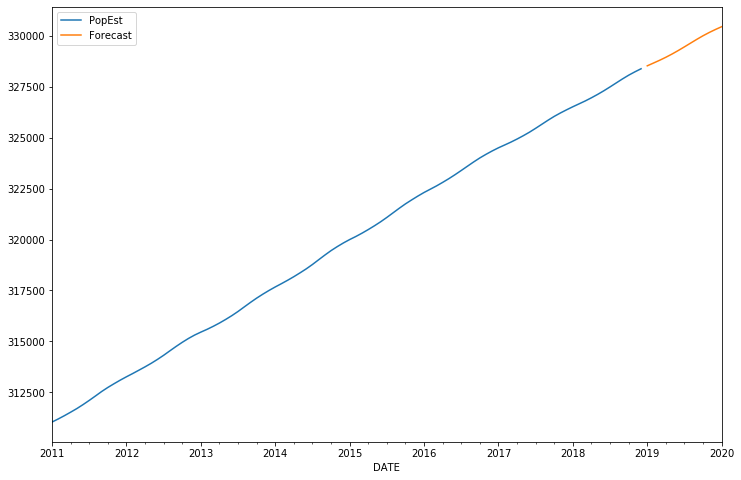

In [84]:
df['PopEst'].plot(figsize=(12,8), legend=True)
forcasted_values.plot(legend=True)

In [86]:
forcasted_values

2019-01-01    328537.420467
2019-02-01    328673.215503
2019-03-01    328810.443245
2019-04-01    328957.592972
2019-05-01    329117.335959
2019-06-01    329289.277295
2019-07-01    329470.144338
2019-08-01    329655.073711
2019-09-01    329839.483130
2019-10-01    330015.435122
2019-11-01    330175.676175
2019-12-01    330322.580392
2020-01-01    330459.617590
Freq: MS, Name: Forecast, dtype: float64